ST1/ST1G Assignment 9 (Capstone Programming Project)  Laptop_price.csv  UCC_student_u3279027StudentID


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### This Project is based on the Laptop Price Prediction data available from Kaggle repository (https://www.kaggle.com/datasets/mrsimple07/laptoppriceprediction/data).


*   It contains the details of 1000 Laptops price on the website.
*   My project task is to create a machine learning model which can predict the average price of the laptop based on its characteristics.
* For solving this problem, I will approach the task, with a step by step approach to create a data analysis and prediction model available from different Python packages, modules and classes.

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
lap = pd.read_csv('/content/drive/MyDrive/Laptop_price.csv', encoding='latin')
print('Shape befor deleting duplicate values:', lap.shape)

# Removing duplicate rows if any
lap=lap.drop_duplicates()
print('Shape After deleting duplicate values:', lap.shape)

lap.head(10)

Shape befor deleting duplicate values: (1000, 7)
Shape After deleting duplicate values: (1000, 7)


,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718
5,HP,1.881348,16,256,11.943958,4.840268,9543.719980
6,Lenovo,2.940721,32,256,11.713246,4.344846,10390.137319
7,Lenovo,3.016788,4,256,15.588315,2.941120,9214.484506
8,Lenovo,2.560327,4,512,15.026332,2.743620,16372.175284
9,Acer,3.341111,32,512,13.611945,4.093149,18501.832733


In [ ]:
lap.tail(10)

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
990,HP,3.091674,4,512,11.460845,2.123205,16896.067520
991,Lenovo,3.034834,32,256,12.409966,4.234475,10148.017389
992,Asus,1.666630,32,1000,15.980906,3.337867,32684.106787
993,HP,2.796020,4,1000,16.689509,2.060070,31571.913189
994,Acer,1.875423,4,512,12.827614,2.187521,16186.628099
995,HP,3.343584,4,1000,12.587095,3.162399,31593.668017
996,Dell,2.780555,8,256,12.679356,3.750265,9149.521832
997,Dell,3.200569,4,512,12.666315,3.392612,16552.404779
998,Asus,1.604182,8,256,11.215581,3.857613,9407.473459
999,Lenovo,1.711980,4,256,16.561498,3.440883,8807.696702


## Key observations from Step 1 about Data Description


*   This file contains 1000 laptops details from the website.
*   There are 7 attributes and they are outlined below.
*   Brand - Based on the manufacturer of the laptop.

*   Processor_Speed - determined by how many calculations the processor can perform per cycle.
*   RAM_Size - provides high-speed, short-term memory for your computer's CPU.
*   Storage_Capacity - how much disk space one or more storage devices provides
*   Screen_Size - physical measurement of the display screen from one corner to the opposite corner, typically measured in inches.
*   Weight - how heavy the laptop is, measured in kilograms (kg).
*   Price - The value of laptops sold by the manufacturer.


# **Step 2:Problem Statement Definition**
Creating a prediction model to predict the price of a laptop
Target Variable: Price Predictors/Features: Processor_Speed, RAM_Size, Storage_Capacity, Screen_Size, Weight.

# Step 3: Choosing the appropriate ML/AI Algorithm for Data Analysis.

```
# Based on the problem statement we need to create a supervised ML Regression model, as the target variable is **Continuous**.
```



# Step 4:Looking at the class distribution (Target variable distribution to check if the data is balanced or skewed.
* If target variable's distribution is too skewed then the predictive modeling will lead to poor results.
* Ideally Bell curve is desirable but slightly positive skew or negative skew is also fine.
* When performing Regression algorithm modelling and analysis, we need to make sure the histogram looks like a bell curve or slight skewed version of it.
* Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios from the data.

<Axes: >

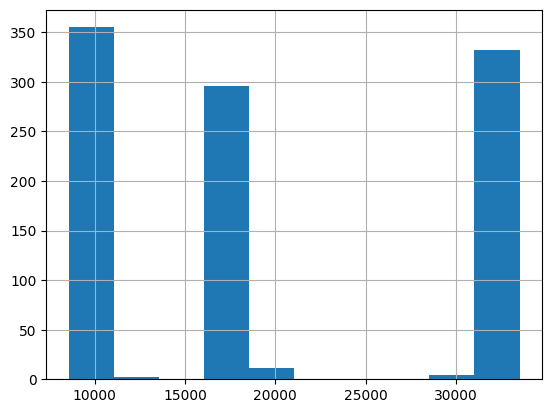

In [ ]:
%matplotlib inline
# Creating histogram as the Target variable is Continuous
# This will help us to understand the distribution of the MEDV values
lap['Price'].hist()

## Observations from Step 4
* The data distribution of the target variable is satisfactory to proceed further.
* There are sufficient number of rows for each type of values to learn from.

## Step 5: Basic Exploratory Data Analysis
* There are four commands which are used for Basic data exploratory Analysis in Python

* head() : This helps to see a few sample rows of the data
* info() : This provides the summarized information of the data
* describe() : This provides the descriptive statistical details of the data
* nunique(): This helps us to identify if a column is categorical or continuous

In [ ]:
# Looking at sample rows in the data
lap.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [ ]:
# Looking at sample rows in the data
lap.tail()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
995,HP,3.343584,4,1000,12.587095,3.162399,31593.668017
996,Dell,2.780555,8,256,12.679356,3.750265,9149.521832
997,Dell,3.200569,4,512,12.666315,3.392612,16552.404779
998,Asus,1.604182,8,256,11.215581,3.857613,9407.473459
999,Lenovo,1.711980,4,256,16.561498,3.440883,8807.696702


In [ ]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
lap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [ ]:
# Looking at the descriptive statistics of the data
lap.describe(include='all')

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
unique,5,NaN,NaN,NaN,NaN,NaN,NaN
top,Dell,NaN,NaN,NaN,NaN,NaN,NaN
freq,210,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,NaN,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,NaN,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,NaN,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,NaN,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,NaN,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754


In [ ]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
lap.nunique()

,0
Brand,5
Processor_Speed,1000
RAM_Size,4
Storage_Capacity,3
Screen_Size,1000
Weight,1000
Price,1000


## Observations from Step 5 - Basic Exploratory Data Analysis
* Hence, creating a initial roadmap for further analysis.

* The selected columns in this step are not final, further study will be done and then a final list will be created

* Brand - Categorical. Selected.
* Processor_Speed - Continuous. Selected.
* RAM_Size - Categorical. Selected.
* Storage_Capacity - Categorical. Selected.
* Screen_Size - Continuous. Selected.
* Weight - Continuous. Selected.
* Price - Continuous. Selected.
* This is the Target or Class Variable, which needs to be predicted by the proposed regression model!

## Step 7: Removing Unwanted columns
* There are no qualitative columns in the data.
* Hence no need to remove any column.

## Step 8: Visual Exploratory Data Analysis
* Visualize distribution of all the Categorical Predictor variables in the data using bar plots
* We can spot a categorical variable in the data by looking at the unique values in them.
* Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.
* Based on the Basic Exploration Data Analysis in the previous step,  we could spotted two categorical predictors in the data

* Categorical Predictors:

* 'RAM_Size',
* 'Brand',
* 'Storage_Capacity'

* We will use bar charts to see how the data is distributed for these categorical columns.


In [ ]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

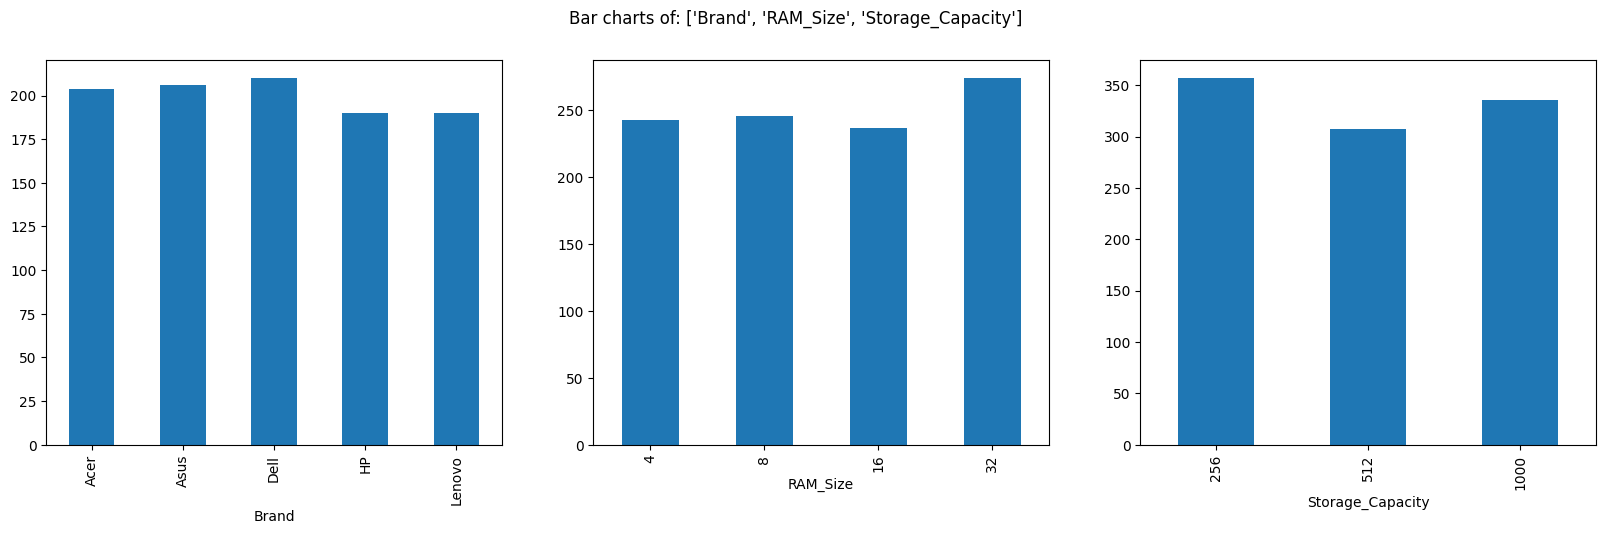

In [ ]:
#####################################################################
# Calling the function PlotBarCharts() we have created
PlotBarCharts(inpData=lap, colsToPlot=['Brand','RAM_Size','Storage_Capacity'])

# Step 9:

array([[<Axes: title={'center': 'Processor_Speed'}>,
        <Axes: title={'center': 'Screen_Size'}>],
       [<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

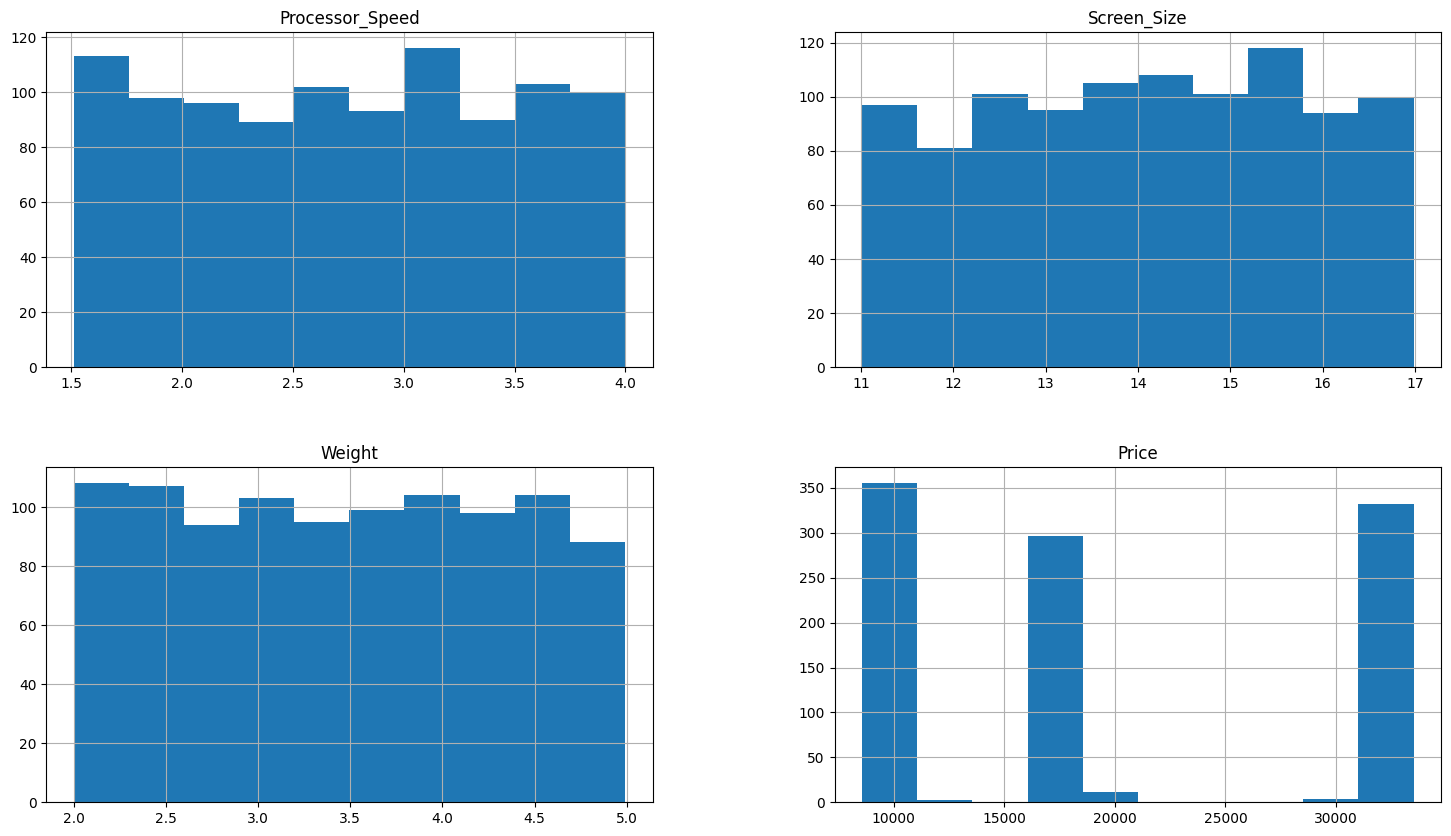

In [ ]:
# Plotting histograms of multiple columns together
lap.hist(['Processor_Speed', 'Screen_Size', 'Weight', 'Price'], figsize=(18,10))

## Step 10: Outlier Analysis
* Outliers are extreme values in the data which are far away from most of the values.
* You can see them as the tails in the histogram.

* Outlier must be treated one column/data attribute at a time.
* As the treatment will be slightly different for each column
* Why I should analyse the outliers?
* Outliers bias the building of machine learning models.
* As the algorithm tries to fit the extreme value, it goes away from majority of the data.
* Outlined below are two options to treat outliers in the data.

* Option-1: Delete the outlier Records. Only if there are just few rows lost.
* Option-2: Impute the outlier values with a logical business value
* Let us find out out the most logical value to be replaced in place of outliers by looking at the histogram.


In [ ]:
#Replacing outliers for 'Volume'
# Finding nearest values to over 40000 (at this histogram larger than 3) mark
lap['Price'][lap['Price']<40000].sort_values(ascending=False)

,Price
424,33503.935037
610,33489.969689
302,33459.847493
338,33370.442080
574,33354.902596
...,...
999,8807.696702
900,8807.456312
899,8780.660812
888,8771.368296


##Step 11:Visualising Data Distribution after outlier removal

array([[<Axes: title={'center': 'Price'}>]], dtype=object)

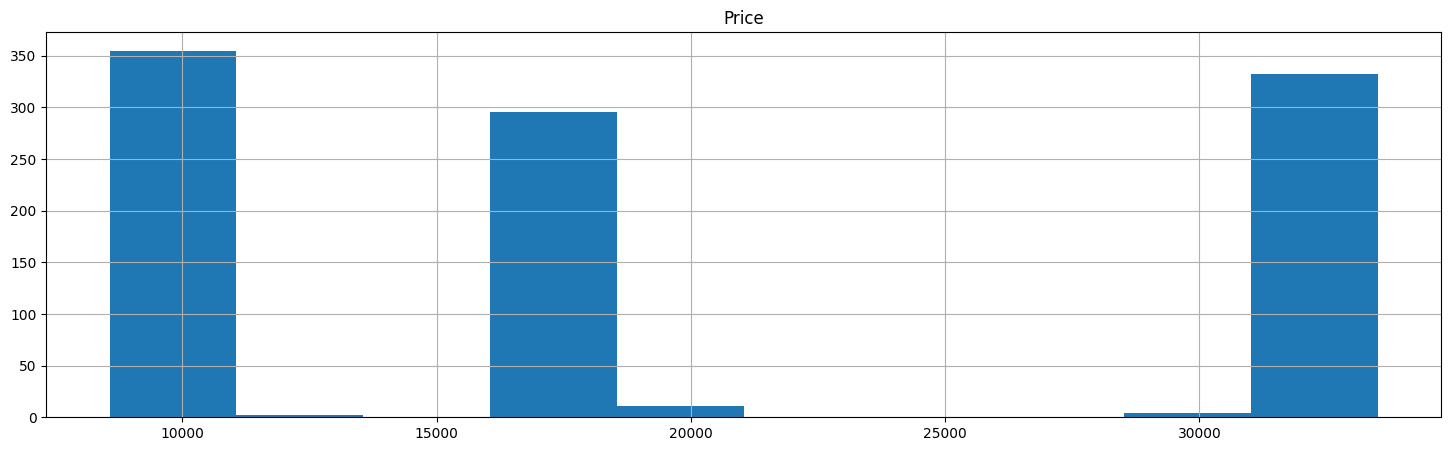

In [ ]:
lap.hist(['Price'], figsize=(18,5))

## Step 12: Missing Values Analysis
Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done.

That column must be rejected because too much information is missing.

Outlined below are some options for treating missing values in data.

Delete the missing value rows if there are only few records

Impute the missing values with MEDIAN value for continuous variables

Impute the missing values with MODE value for categorical variables

Interpolate the values based on nearby values

Interpolate the values based on business logic

In [ ]:
# Finding how many missing values are there for each column
lap.isnull().sum()

,0
Brand,0
Processor_Speed,0
RAM_Size,0
Storage_Capacity,0
Screen_Size,0
Weight,0
Price,0


##Observations from Step 12: Missing Value Analysis
* No missing values in data
* So no removal is required


## Step 13: Feature Selection (Attribute Selection)

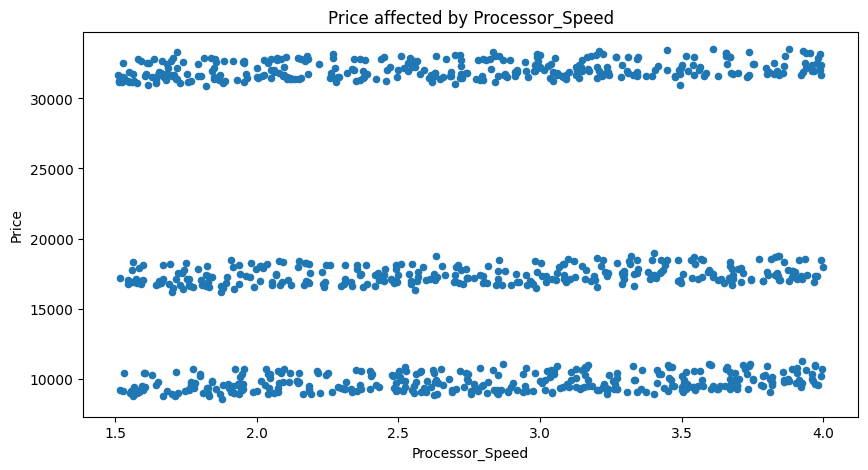

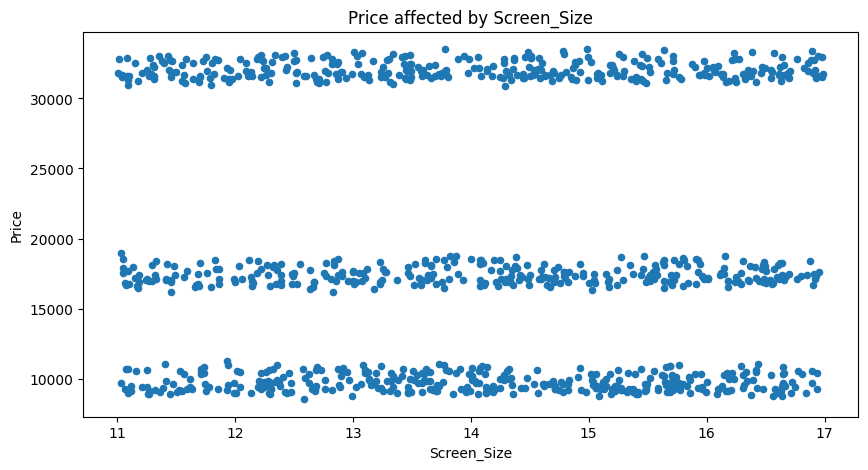

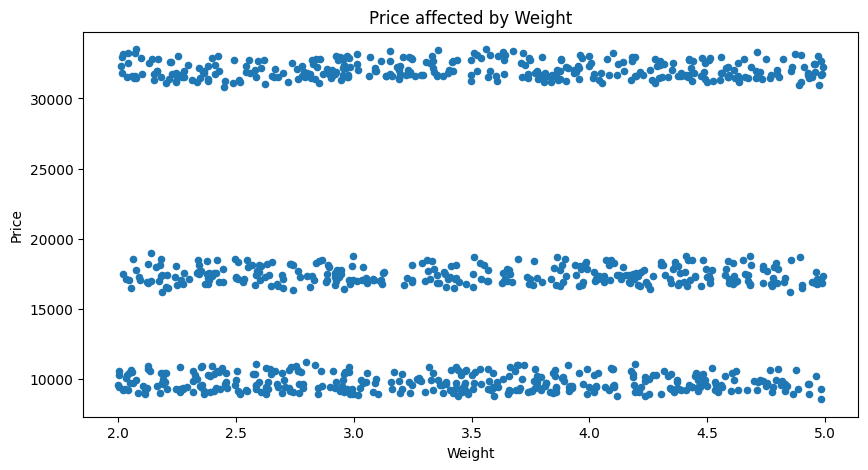

In [ ]:
ContinuousCols=['Processor_Speed', 'Screen_Size', 'Weight']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    lap.plot.scatter(x=predictor, y='Price', figsize=(10,5), title="Price" + " affected by "+predictor)

## Scatter charts interpretation
* What should you look for in these scatter charts?

* **No Trend**: You cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence that predictor/feature may not be the best one for ML model building.

## Step 14: Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

* Pearson's correlation coefficient is a powerful metric for doing this.
* It can simply be calculated as the covariance between two features  x and  y
  (numerator) divided by the product of their standard deviations (denominator):

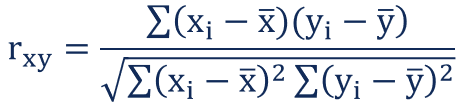

* This value can be calculated only between two numeric columns
Correlation between [-1,0) means inversely proportional, the scatter plot will show a downward trend
* Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend
* Correlation near {0} means No relationship, the scatter plot will show no clear trend.
* If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship the sign does not matter
* We observe the correlations between Target variable and all other predictor variables(s) to check which columns/features/predictors are actually related to the target variable in question.

# Calculating correlation matrix
ContinuousCols=['Price', 'Processor_Speed', 'Screen_Size', 'Weight']

# Creating the correlation matrix
CorrelationData=BostonData[ContinuousCols].corr()
CorrelationData

In [ ]:
# Calculating correlation matrix
ContinuousCols=['Price', 'Processor_Speed', 'Screen_Size', 'Weight']

# Creating the correlation matrix
CorrelationData=lap[ContinuousCols].corr()
CorrelationData

,Price,Processor_Speed,Screen_Size,Weight
Price,1.000000,-0.050737,-0.026740,0.038417
Processor_Speed,-0.050737,1.000000,-0.013425,-0.054603
Screen_Size,-0.026740,-0.013425,1.000000,0.021995
Weight,0.038417,-0.054603,0.021995,1.000000


In [ ]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['Price'][abs(CorrelationData['Price']) > -0.01 ]

,Price
Price,1.000000
Processor_Speed,-0.050737
Screen_Size,-0.026740
Weight,0.038417


## Observations from Step 14
* Final selected Continuous columns:
'Processor_Speed', 'Screen_Size'

# Step 15:  Relationship exploration: Categorical Vs Continuous -- Box Plots
* When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots,  and
* Measure the strength of relation using Anova test.

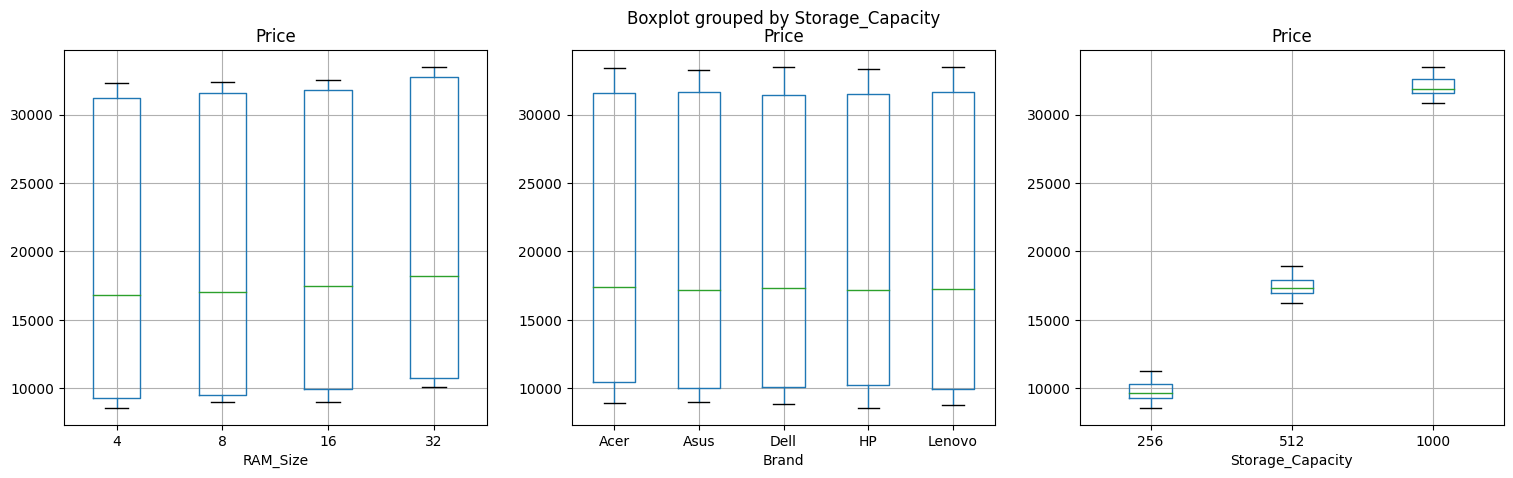

In [ ]:
# Box plots for continuous Target Variable "Price" and Categorical predictors
CategoricalColsList=['RAM_Size', 'Brand','Storage_Capacity']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Price"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    lap.boxplot(column='Price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

##Observations from Step 15: Box-Plots interpretation

* What should you look for in these box plots?

* These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

* If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

* On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with Price.

* For this datadata, both the categorical predictors looks correlated with the Target variable.

We confirm this by looking at the results of ANOVA test below

## Step 16: Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

* Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

* Assumption(H0) Null Hypothesis: There is NO relation between the given variables (i.e.
* The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
* ANOVA Test result: Probability of H0 (Null Hypothesis being true

In [ ]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] > -0.01):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

In [ ]:
#Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['RAM_Size', 'Brand','Storage_Capacity']
FunctionAnova(inpData=lap,
              TargetVariable='Price',
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

RAM_Size is correlated with Price | P-Value: 0.09529165426315755
Brand is correlated with Price | P-Value: 0.7023859404569301
Storage_Capacity is correlated with Price | P-Value: 0.0


['RAM_Size', 'Brand', 'Storage_Capacity']

##Observations from Step 16
* The results of ANOVA confirm our visual analysis using box plots above.

* All categorical variables are correlated with the Target variable.
* This is something you can guess by looking at the box plots!

* Final selected Categorical columns:

'Storage_Capacity', 'RAM_Size', 'Processor_Speed', 'Screen_Size'


## Selecting final Predictors/Features for building Machine Learning/AI model.
* Based on the extensive tests with exploratory data analysis, we can select the final features/predictors/columns for machine learning model building as:
* **'Storage_Capacity','RAM_Size', 'Processor_Speed', 'Screen_Size'**

In [ ]:
SelectedColumns=['Price', 'Storage_Capacity','RAM_Size', 'Processor_Speed', 'Screen_Size']

# Selecting final columns
DataForML=lap[SelectedColumns]
DataForML.head()

,Price,Storage_Capacity,RAM_Size,Processor_Speed,Screen_Size
0,17395.093065,512,16,3.830296,11.185147
1,31607.605919,1000,4,2.912833,11.311372
2,9291.023542,256,4,3.241627,11.853023
3,17436.728334,512,16,3.806248,12.280360
4,32917.990718,1000,32,3.268097,14.990877


In [ ]:
# Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')

## Step 17: Data Pre-processing for Machine Learning Model Building or Model Development
* List of steps that needs to be performed on predictor variables before data can be used for machine learning

* Converting each Ordinal Categorical columns to numeric
* Converting Binary nominal Categorical columns to numeric using 1/0 mapping
* Converting all other nominal categorical columns to numeric using pd.get_dummies()
* Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks
* Converting the ordinal variable to numeric - In this data there is no Ordinal categorical variable.
* Converting the binary nominal variable to numeric using 1/0 mapping: There is no binary nominal variable in string format in this data


## Converting the nominal variable to numeric using get_dummies()

In [ ]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Price']=lap['Price']

# Printing sample rows
DataForML_Numeric.head()

,Price,Storage_Capacity,RAM_Size,Processor_Speed,Screen_Size
0,17395.093065,512,16,3.830296,11.185147
1,31607.605919,1000,4,2.912833,11.311372
2,9291.023542,256,4,3.241627,11.853023
3,17436.728334,512,16,3.806248,12.280360
4,32917.990718,1000,32,3.268097,14.990877


## Step 18: Machine Learning Model Development:
* Splitting the data into Training and Testing sample
* We dont use the full data for creating the model (training data).
* Some data is randomly selected and kept aside for checking how good the model is.
* This is known as Testing Data and the remaining data is called Training data on which the model is built.
* Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [ ]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Price', 'Storage_Capacity', 'RAM_Size', 'Processor_Speed',
       'Screen_Size'],
      dtype='object')

In [ ]:
#Separate Target Variable and Predictor Variables
TargetVariable='Price'
Predictors=['Storage_Capacity','RAM_Size', 'Processor_Speed', 'Screen_Size']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

## Step 19: Standardization/Normalization of data
* You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data (Optional Step)

* However, if you are using KNN or Neural Networks, then this step becomes necessary.

In [ ]:
### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(700, 4)
(700,)
(300, 4)
(300,)


## Step 20: Multiple Linear Regression Algorithm For ML/AI model building

In [ ]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

price=np.mean(TestingDataResults['APE'])
Medianprice=np.median(TestingDataResults['APE'])

Accuracy =100 - price
MedianAccuracy=100- Medianprice
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using price
def Accuracy_Score(orig,pred):
    price = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-price)
    return(100-price)

# Custom Scoring price calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.999553749196628

##### Model Validation and Accuracy Calculations ##########
   Storage_Capacity  RAM_Size  Processor_Speed  Screen_Size         Price  \
0               0.0  1.000000         0.730771     0.883481  10900.502075   
1               1.0  0.142857         0.269398     0.331645  31727.516697   
2               0.0  0.428571         0.177443     0.637880   9636.022750   
3               0.0  0.000000         0.688487     0.337113   9412.599857   
4               1.0  0.428571         0.443585     0.277660  31641.105861   

   PredictedPrice  
0         10741.0  
1         31547.0  
2          9619.0  
3          9249.0  
4         32036.0  
Mean Accuracy on test data: 99.02046705795074
Median Accuracy on test data: 99.32762952041615

Accuracy values for 10-fold Cross Validation:
 [98.90309769 98.94898482 98.88540551 99.20509827 98.95384658 98.82245888
 99.09989913 99.11917602 99.05929628 98.96566729]

Final Average Accuracy of the model: 99.0




```
# This is formatted as code
```

# Decision Tree Regressor

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.9995346345011787

##### Model Validation and Accuracy Calculations ##########
   Storage_Capacity  RAM_Size  Processor_Speed  Screen_Size         Price  \
0               0.0  1.000000         0.730771     0.883481  10900.502075   
1               1.0  0.142857         0.269398     0.331645  31727.516697   
2               0.0  0.428571         0.177443     0.637880   9636.022750   
3               0.0  0.000000         0.688487     0.337113   9412.599857   
4               1.0  0.428571         0.443585     0.277660  31641.105861   

   PredictedPrice  
0         10682.0  
1         31531.0  
2          9859.0  
3          9206.0  
4         32060.0  
Mean Accuracy on test data: 98.8360783347957
Median Accuracy on test data: 99.23156584001563

Accuracy values for 10-fold Cross Validation:
 [98.77570553 98.91775606 98.61765881 99.05315161 98.81500451 98.61844217
 98.93953442 98.8008986  98.70784912 98.80087898]

F

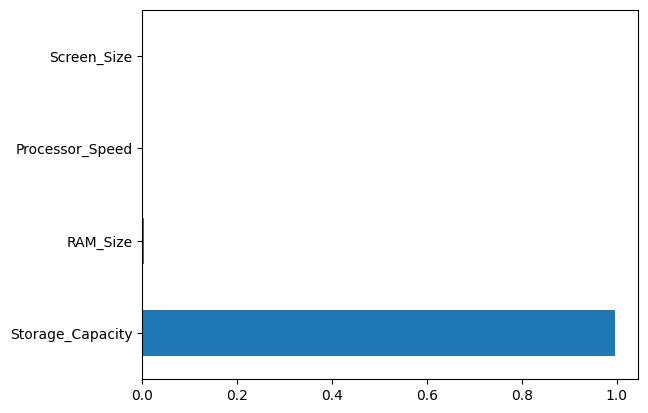

In [ ]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting/Visualising the Decision Tree

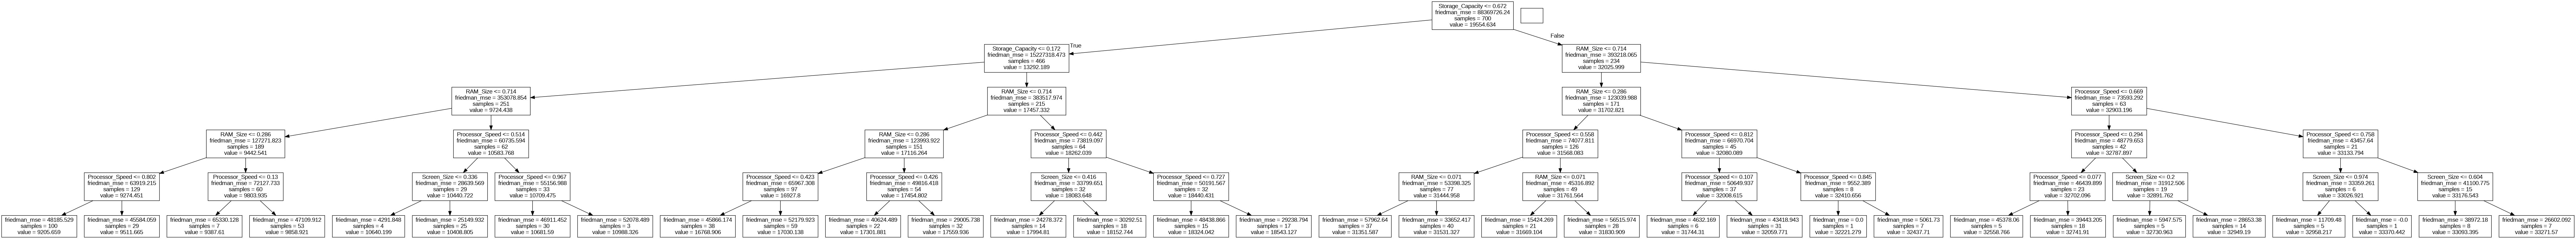

In [ ]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None,
                                feature_names=Predictors)

# printing the rules
#print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in

# Random Forest Regressor

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.999416322309198

##### Model Validation and Accuracy Calculations ##########
   Storage_Capacity  RAM_Size  Processor_Speed  Screen_Size         Price  \
0               0.0  1.000000         0.730771     0.883481  10900.502075   
1               1.0  0.142857         0.269398     0.331645  31727.516697   
2               0.0  0.428571         0.177443     0.637880   9636.022750   
3               0.0  0.000000         0.688487     0.337113   9412.599857   
4               1.0  0.428571         0.443585     0.277660  31641.105861   

   PredictedPrice  
0         10667.0  
1         31423.0  
2          9805.0  
3          9271.0  
4         32006.0  
Mean Accuracy on test data: 98.78224315527845
Median Accuracy on test data: 99.1574525774031

Accuracy values for 10-fold Cross Validation:
 [98.7821713  98.81147982 98.57734043 98.99877436 98.86598628 98.44019904
 98.75955164 98.87915927 98.8155700

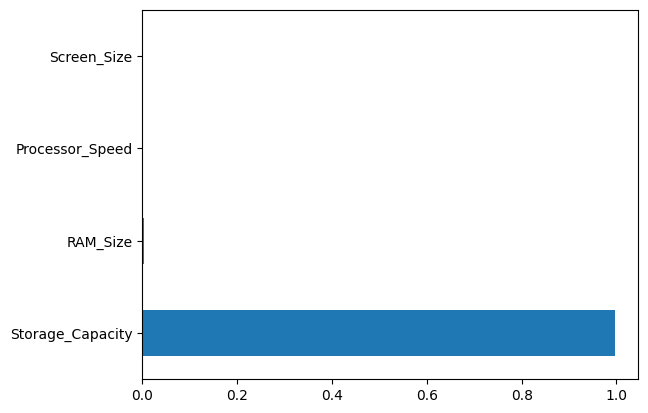

In [ ]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting One of the Decision Tree in Random Forest Regressor

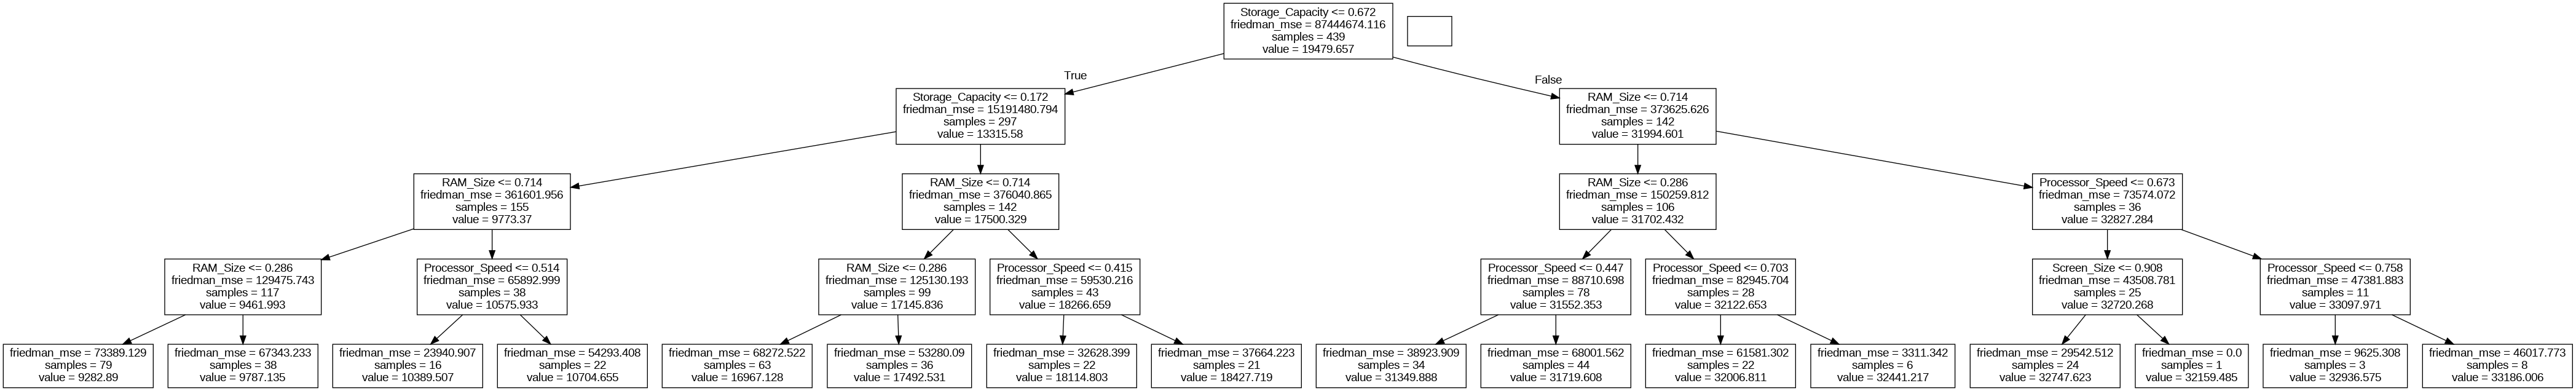

In [ ]:
# Plotting a single Decision Tree from Random Forest
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[5] , out_file=None, feature_names=Predictors)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in


## Step 21: AdaBoost Algorithm For ML/AI model building

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


R2 Value: 0.998971333097334

##### Model Validation and Accuracy Calculations ##########
   Storage_Capacity  RAM_Size  Processor_Speed  Screen_Size         Price  \
0               0.0  1.000000         0.730771     0.883481  10900.502075   
1               1.0  0.142857         0.269398     0.331645  31727.516697   
2               0.0  0.428571         0.177443     0.637880   9636.022750   
3               0.0  0.000000         0.688487     0.337113   9412.599857   
4               1.0  0.428571         0.443585     0.277660  31641.105861   

   PredictedPrice  
0         10600.0  
1         31545.0  
2          9483.0  
3          9451.0  
4         32085.0  
Mean Accuracy on test data: 98.43768203513113
Median Accuracy on test data: 98.98623462947799


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en


Accuracy values for 10-fold Cross Validation:
 [98.44824595 98.25570669 98.25345331 98.72983104 98.38412349 98.24254575
 98.36181876 98.53415797 98.17442818 98.13223694]

Final Average Accuracy of the model: 98.35


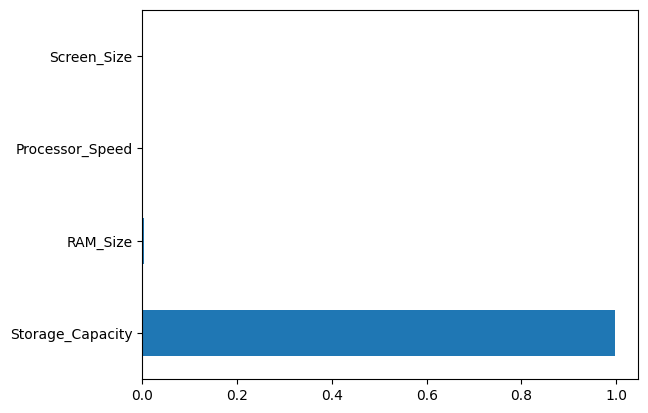

In [ ]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# XGBoost Regressor

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)
R2 Value: 0.9997854470923611


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:01:48] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



##### Model Validation and Accuracy Calculations ##########
   Storage_Capacity  RAM_Size  Processor_Speed  Screen_Size         Price  \
0               0.0  1.000000         0.730771     0.883481  10900.502075   
1               1.0  0.142857         0.269398     0.331645  31727.516697   
2               0.0  0.428571         0.177443     0.637880   9636.022750   
3               0.0  0.000000         0.688487     0.337113   9412.599857   
4               1.0  0.428571         0.443585     0.277660  31641.105861   

   PredictedPrice  
0         10778.0  
1         31531.0  
2          9684.0  
3          9190.0  
4         31958.0  
Mean Accuracy on test data: 98.8114744015255
Median Accuracy on test data: 99.15116495419943


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:01:48] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:01:49] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:01:50] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



Accuracy values for 10-fold Cross Validation:
 [98.80999098 98.83574327 98.69945576 99.12437573 98.83867194 98.69276241
 98.88338918 99.01301741 98.89358045 98.87411662]

Final Average Accuracy of the model: 98.87


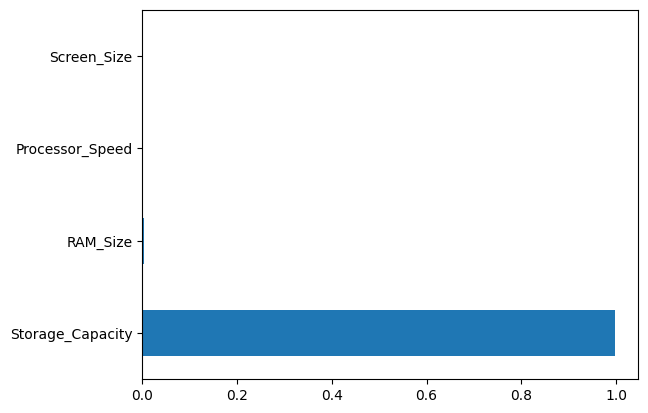

In [ ]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

#Plotting a single Decision tree out of XGBoost

<Axes: >

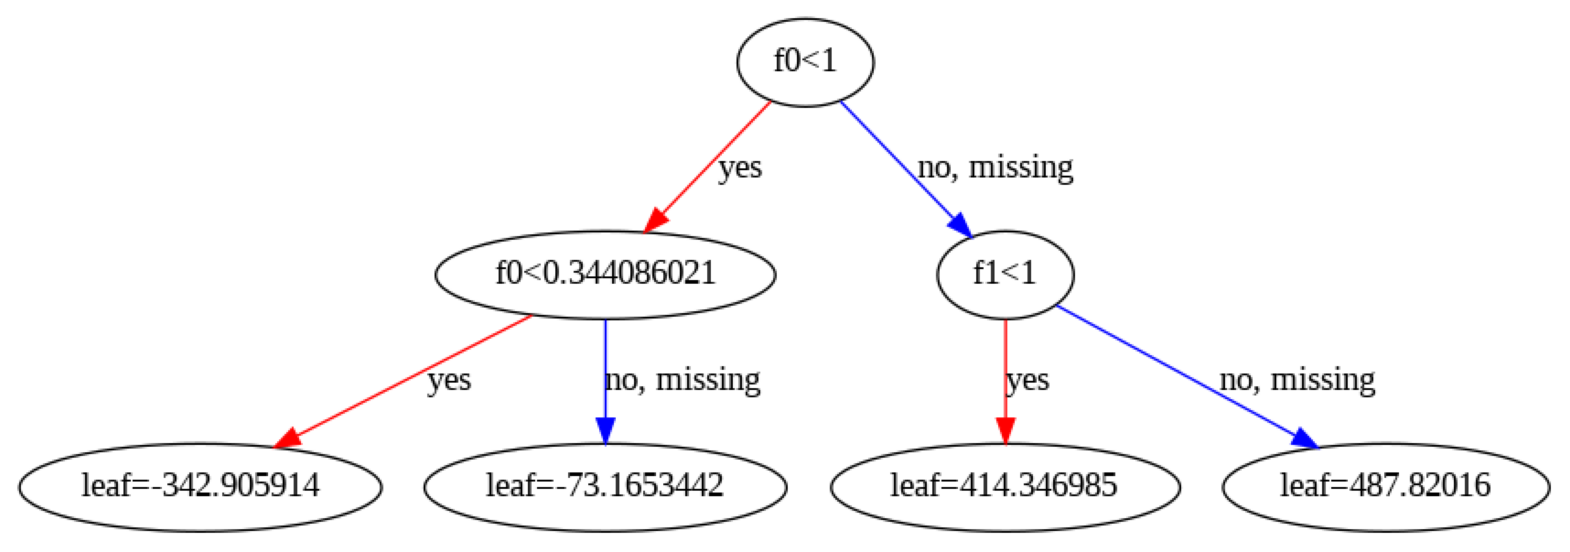

In [ ]:
#Plotting a single Decision tree out of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

# K-Nearest Neighbor(KNN)

In [ ]:
#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.9996913744129267

##### Model Validation and Accuracy Calculations ##########
   Storage_Capacity  RAM_Size  Processor_Speed  Screen_Size         Price  \
0               0.0  1.000000         0.730771     0.883481  10900.502075   
1               1.0  0.142857         0.269398     0.331645  31727.516697   
2               0.0  0.428571         0.177443     0.637880   9636.022750   
3               0.0  0.000000         0.688487     0.337113   9412.599857   
4               1.0  0.428571         0.443585     0.277660  31641.105861   

   PredictedPrice  
0         10657.0  
1         31481.0  
2          9614.0  
3          9172.0  
4         31983.0  
Mean Accuracy on test data: 98.84680084446042
Median Accuracy on test data: 99.21267471328086

Accuracy values for 10-fold Cross Validation:
 [98.87999197 98.90053438 98.61361327 99.01415636 98.76631716 98.69819389
 98.93997805 98.98337972 98.82197716 98.78524458]

Final Average Accuracy of 

# Support Vector Machine (SVM) Regressor

In [ ]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVR(C=50, gamma=0.01)
R2 Value: -0.034999376458063614

##### Model Validation and Accuracy Calculations ##########
   Storage_Capacity  RAM_Size  Processor_Speed  Screen_Size         Price  \
0               0.0  1.000000         0.730771     0.883481  10900.502075   
1               1.0  0.142857         0.269398     0.331645  31727.516697   
2               0.0  0.428571         0.177443     0.637880   9636.022750   
3               0.0  0.000000         0.688487     0.337113   9412.599857   
4               1.0  0.428571         0.443585     0.277660  31641.105861   

   PredictedPrice  
0         17258.0  
1         17438.0  
2         17218.0  
3         17191.0  
4         17457.0  
Mean Accuracy on test data: 57.120629359122155
Median Accuracy on test data: 54.24960162775578

Accuracy values for 10-fold Cross Validation:
 [55.43247655 57.98144333 55.49402973 56.53844542 60.00847956 54.15585605
 54.38900722 64.42278629 52.48799835 54.53206546]

Final Average Accuracy of the model

# Step 21: Model Deployment
* Deployment of the Model - Based on the above trials we select that algorithm which produces the best average accuracy.

* In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them.

* I am choosing XGboost as the final model it has the highest accuracy!

* In order to deploy the model we follow steps outlined next.

* Train/Build the model again using 100% data available

* Save the model as a serialized file which can be stored anywhere.

* Create a python function which gets integrated with front-end Viewer(GUI/ Website etc.) to take all the inputs and returns the prediction

* Choosing only the most important variables

* Its beneficial to keep lesser number of predictors for the model while deploying it in production.

* The lesser predictors you keep, the better it is, because the model will be less dependent on predictor columns/features, hence, more stable.

* This is important specially when the data is high dimensional(too many predictor columns/features).

* For this dataset, the most important predictor variables are 'Storage_Capacity','RAM_Size', 'Processor_Speed', 'Screen_Size'. As these are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables will result in better house price prediction platform/system.

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable='Price'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['Storage_Capacity','RAM_Size', 'Processor_Speed', 'Screen_Size']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(1000, 4)
(1000,)


# Cross validating the final model accuracy with less predictors

In [ ]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# choose from different tunable hyper parameters
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:00:00] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:00:01] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:00:02] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



Accuracy values for 10-fold Cross Validation:
 [98.80999098 98.83574327 98.69945576 99.12437573 98.83867194 98.69276241
 98.88338918 99.01301741 98.89358045 98.87411662]

Final Average Accuracy of the model: 98.87


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:00:03] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


# Step 22: Retraining the final model using 100% data

In [ ]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

# Step 23: Save the model as a serialized file which can be stored anywhere

In [ ]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content


# Step 24: Create a python function

In [ ]:
from re import IGNORECASE
# This Function can be called from any from any front end tool/website

def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input

    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    #InputData=InputData.append(DataForML, ignore_index=True)
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors=['Storage_Capacity','RAM_Size', 'Processor_Speed', 'Screen_Size']

    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)

    # Loading the Function from pickle file
    import pickle
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()

    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

# Step 25: Calling the function for some new data

In [ ]:
# Calling the function for some new data
NewSampleData=pd.DataFrame(data=[[512,16,3.83029570620903,11.1851474258484],[1000,4,2.91283295897302,11.3113717971104]],columns=['Storage_Capacity','RAM_Size', 'Processor_Speed', 'Screen_Size'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData=NewSampleData)

   Storage_Capacity  RAM_Size  Processor_Speed  Screen_Size
0               512        16         3.830296    11.185147
1              1000         4         2.912833    11.311372


,Prediction
0,17421.177734
1,31515.185547


# Conclusion
* The Function FunctionPredictResult() can be used to produce the predictions for one or more new cases at a time.
* Hence, it can be scheduled using a batch job or cron job to run every night and generate predictions for all the house price tasks  in the platform /system.

# Deploying a predictive model as an API
* Django and flask are two popular ways to deploy predictive models as a web service
* You can call your predictive models using a URL from any front end like tableau, java or angular js


# Deploying the model with few parameters
# Function for predictions API

In [ ]:
# Creating the function which can take inputs and return prediction
def FunctionGeneratePrediction(inp_Storage_Capacity, inp_RAM_Size, inp_Processor_Speed, inp_Screen_Size): # Changed argument name here

    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(
     data=[[inp_Storage_Capacity, inp_RAM_Size, inp_Processor_Speed, inp_Screen_Size]],
     columns=['Storage_Capacity','RAM_Size', 'Processor_Speed', 'Screen_Size'])

    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData= SampleInputData)

    # Returning the predictions
    return(Predictions.to_json())

# Function call
FunctionGeneratePrediction( inp_Storage_Capacity=512, inp_RAM_Size=16, inp_Processor_Speed=3.83029570620903, inp_Screen_Size=11.1851474258484 ) # Argument name changed to match

'{"Prediction":{"0":17421.177734375}}'

# Web Deployment using Flask Library/Package
# Installing the flask library required to create the API


In [1]:
!pip install flask

# Creating Flask API



In [1]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [2]:
app = Flask(__name__)

@app.route('/prediction_api', methods=["GET"])
def prediction_api():
    try:
        # Getting the paramters from API call
        Storage_Capacity_value = float(request.args.get('Storage_Capacity'))
        RAM_Size_value = float(request.args.get('RAM_Size'))
        Processor_Speed_value = float(request.args.get('Processor_Speed'))
        Screen_Size_value = float(request.args.get('Screen_Size'))

        # Calling the funtion to get predictions
        prediction_from_api=FunctionGeneratePrediction(
                                                       inp_Storage_Capacity=Storage_Capacity_value,
                                                       inp_RAM_Size=RAM_Size_value,
                                                       inp_Processor_Speed=Processor_Speed_value,
                                                       inp_Screen_Size=Screen_Size_value
                                                )

        return (prediction_from_api)

    except Exception as e:
        return('Something is not right!:'+str(e))

# Starting the API engine

In [9]:
import os
if __name__ =="__main__":

    # Hosting the API in localhost
    app.run(host='127.0.0.2', port=9000, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.2:9000
INFO:werkzeug:Press CTRL+C to quit
